# Scissors-Paper-Rock code

In [2]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

from IPython.core.interactiveshell import InteractiveShell

In [3]:
from Basic_functions import *
from Basics_SPR import *
 #setup, loadGamesForPlayer, listPlayers, translateMove, translateResult

# Compute Mutual Information for Player (just one)

In [4]:
def computeMutualInformationForPlayer(name, fromSelf, flag = True):

    if flag:
        print('Defaulting to examine MI from own players past\n')
        fromSelf = True

    # Step 1: load all of the player's games' data:
    games = loadGamesForPlayer(name)[1]

    # Step 2: the player's moves are in the first column, oppenent's in 2nd, pull these from
    #  each game into arrays of samples that we can compute mutual info on:
    nextMoves = []
    previousMoves = []
    results = []
                  
    for index in range(len(games)):
        # Load data from game gameIndex into the variable game
        game = games[index]
        game = np.array(game)
        
        # First column of game is the player's move, second is opponent's
        #  and third is the result.
        moves = game[:,0]
        opponentMoves = game[:,1]
        playersResults = game[:,2]
        
        # Append this player's moves to the array we're storing over all iterations.
        #  TAKE CARE: Can we take all samples here, or only a limited number that
        #  we're able to match up properly to compute mutual information?
        nextMoves.append(moves[1:])
        if fromSelf:
            # Grab the previous moves from this player:
            # HINT: This will be the same thing you did in computeConditionalEntropyForPlayer:
            previousMoves.append(moves[:-1])
        else:
            # Grab the previous moves from their opponent:
            previousMoves.append(opponentMoves[:-1])

        # Append this player's results to the array over all iterations:
        #  Which results do we want here -- those of the previous iteration or this one?
        # HINT: This will be the same thing you did in computeConditionalEntropyForPlayer:
        results.append(playersResults[1:])

    # Flattening the arrays: Converting them in one-dimensional arrays   
    nextMoves = np.array(nextMoves).flatten()
    previousMoves = np.array(previousMoves).flatten()
    results_array = np.array(results).flatten()

    # Step 3: compute the mutual information for this player's moves using our existing scripts:
    calculatedMI = mutualinformationempirical(nextMoves, previousMoves)

    # Step 4: compute the win and loss rates:

    winRate = np.sum(results_array == 1) / len(results_array)
    lossRate = np.sum(results_array == -1)/len(results_array)
    
    numGames = len(results_array)
    numGames = len(results)
    
    
    if flag:
        print('MI for {} over {} iterations: {:.04f}\n'.\
            format(name, len(nextMoves), calculatedMI))
        print(winRate)
    else: 
        return calculatedMI, winRate, lossRate, numGames

In [5]:
computeMutualInformationForPlayer("Player1", fromSelf = True, flag = True)

Defaulting to examine MI from own players past

player1: Player1, player2: Player2

Player2 Player2
Game 0 for Player1 (19 iterations):

Player1:	scis,	Player2:	papr,	result: win

Player1:	papr,	Player2:	rock,	result: win

Player1:	scis,	Player2:	papr,	result: win

Player1:	rock,	Player2:	papr,	result: los

Player1:	scis,	Player2:	rock,	result: los

Player1:	papr,	Player2:	scis,	result: los

Player1:	papr,	Player2:	papr,	result: tie

Player1:	scis,	Player2:	rock,	result: los

Player1:	scis,	Player2:	papr,	result: win

Player1:	scis,	Player2:	papr,	result: win

Player1:	papr,	Player2:	papr,	result: tie

Player1:	rock,	Player2:	rock,	result: tie

Player1:	rock,	Player2:	rock,	result: tie

Player1:	scis,	Player2:	rock,	result: los

Player1:	scis,	Player2:	rock,	result: los

Player1:	rock,	Player2:	scis,	result: win

Player1:	rock,	Player2:	papr,	result: los

Player1:	scis,	Player2:	papr,	result: win

Player1:	papr,	Player2:	rock,	result: win

player1: Player3, player2: Player2

player1: P

# Compute Mutual Information for AllPlayers

In [6]:
def computeMutualInformationForAllPlayers(fromSelf, flag=True):

    if flag:
        fromSelf = True


    # Step 1: load all of the player's names:
    names = listPlayers()

    # Step 2: compute mutual info for each player:
    index = 0
    mutualInfos = np.zeros(len(names))
    winRates = np.zeros(len(names))
    lossRates = np.zeros(len(names))
    
    for name in names:
        calculatedMI, winRate, lossRate, numGames = computeMutualInformationForPlayer(name, fromSelf, False)
        print('{} = {:.03f},\twin rate = {:.03f},\tloss rate = {:.03f}, num games = {:.03f}\n'.\
            format(name, calculatedMI, winRate, lossRate, numGames))
        
        mutualInfos[index] = calculatedMI
        winRates[index] = winRate
        lossRates[index] = lossRate

        index = index + 1

    # Plot the winRates and lossRates versus entropies:
    plt.figure(1)
    plt.plot(mutualInfos, winRates, 'x')
    plt.title('Win rates versus mutual information of single players')
    plt.xlabel('Entropy of moves (bits)')
    plt.ylabel('Win rate')
    
    plt.figure(2)
    plt.plot(mutualInfos, lossRates, 'x')
    plt.title('Loss rates versus mutual information of single players')
    plt.xlabel('Entropy of moves (bits)')
    plt.ylabel('Loss rate')

  
    # Python's coerr, so do this the easy way:
    winToMICorr, winToMICorrPValue = stats.spearmanr(winRates, mutualInfos)
    lossToMICorr, lossToMICorrPValue = stats.spearmanr(lossRates, mutualInfos)
    
    
    print('Correlation of win rate to MI is: {:.04f} (pValue {:.04f})\n'.\
        format(winToMICorr, winToMICorrPValue))
    print('Correlation of loss rate to MI is: {:.04f} (pValue {:.04f})\n'.\
        format(lossToMICorr, lossToMICorrPValue))

    return names, mutualInfos, winRates, lossRates



Test1_Player1_Player2.txt
player1: Player1, player2: Player2

Test2_Player3_Player2.txt
player1: Player3, player2: Player2

Test5_Player1_Player3.txt
player1: Player1, player2: Player3

Player names:

Player1
Player2
Player3
player1: Player1, player2: Player2

Player2 Player2
Game 0 for Player1 (19 iterations):

Player1:	scis,	Player2:	papr,	result: win

Player1:	papr,	Player2:	rock,	result: win

Player1:	scis,	Player2:	papr,	result: win

Player1:	rock,	Player2:	papr,	result: los

Player1:	scis,	Player2:	rock,	result: los

Player1:	papr,	Player2:	scis,	result: los

Player1:	papr,	Player2:	papr,	result: tie

Player1:	scis,	Player2:	rock,	result: los

Player1:	scis,	Player2:	papr,	result: win

Player1:	scis,	Player2:	papr,	result: win

Player1:	papr,	Player2:	papr,	result: tie

Player1:	rock,	Player2:	rock,	result: tie

Player1:	rock,	Player2:	rock,	result: tie

Player1:	scis,	Player2:	rock,	result: los

Player1:	scis,	Player2:	rock,	result: los

Player1:	rock,	Player2:	scis,	result: win

(['Player1', 'Player2', 'Player3'],
 array([0.08089, 0.1244 , 0.05808]),
 array([0.41666667, 0.33333333, 0.47222222]),
 array([0.41666667, 0.44444444, 0.36111111]))

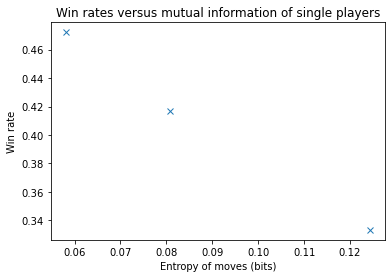

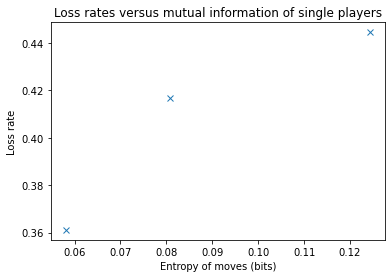

In [7]:
computeMutualInformationForAllPlayers(1, flag=True)

# Conditional Entropy for Player (just one)

In [8]:
def computeConditionalEntropyForPlayer(name, flag=True):

    # Step 1: load all of the player's games' data:
    games = loadGamesForPlayer(name)[1]
    
    
    # Step 2: the player's moves are in the first column, pull these from
    #  each game into arrays of samples that we can compute conditional entropy on:
    nextMoves = []
    previousMoves = []
    results = []
    
    for index in range(len(games)):
        # Load data from game gameIndex into the variable game

        game = games[index]
        # First column of game is the player's move, second is opponent's
        #  and third is the result.
        
        game = np.array(game)
        
        moves = game[:,0]
        playersResults = game[:,2]
        
        # Append this player's moves to the array we're storing over all iterations.
        #  TAKE CARE: Can we take all samples here, or only a limited number that
        #  we're able to match up properly to compute conditional entropy?
        nextMoves.append(moves[1:])
        previousMoves.append(moves[:-1])
        # Append this player's results to the array over all iterations:
        #  Which results do we want here -- those of the previous iteration or this one?
        results.append(playersResults[1:])
    
    # Flattening the arrays: Converting them in one-dimensional arrays
    nextMoves = np.array(nextMoves).flatten()
    previousMoves = np.array(previousMoves).flatten()
    results_array = np.array(results).flatten()
    
    
    # Step 3: compute the condtional entropy for this player's moves using our existing scripts:
    calculatedEntropy = conditionalentropyempirical(nextMoves, previousMoves)

    
    # Step 4: compute the win and loss rates:
    
    
    winRate = np.sum(results_array == 1) / len(results_array)
    lossRate = np.sum(results_array == -1)/len(results_array)
    
    numGames = len(results_array)

    if flag:
        print('Entropy for {} over {} iterations: {:.04f}\n'.\
                format(name, len(nextMoves), calculatedEntropy))
                          
    else: 
        return calculatedEntropy, winRate, lossRate, numGames

In [9]:
computeConditionalEntropyForPlayer("Player1")

player1: Player1, player2: Player2

Player2 Player2
Game 0 for Player1 (19 iterations):

Player1:	scis,	Player2:	papr,	result: win

Player1:	papr,	Player2:	rock,	result: win

Player1:	scis,	Player2:	papr,	result: win

Player1:	rock,	Player2:	papr,	result: los

Player1:	scis,	Player2:	rock,	result: los

Player1:	papr,	Player2:	scis,	result: los

Player1:	papr,	Player2:	papr,	result: tie

Player1:	scis,	Player2:	rock,	result: los

Player1:	scis,	Player2:	papr,	result: win

Player1:	scis,	Player2:	papr,	result: win

Player1:	papr,	Player2:	papr,	result: tie

Player1:	rock,	Player2:	rock,	result: tie

Player1:	rock,	Player2:	rock,	result: tie

Player1:	scis,	Player2:	rock,	result: los

Player1:	scis,	Player2:	rock,	result: los

Player1:	rock,	Player2:	scis,	result: win

Player1:	rock,	Player2:	papr,	result: los

Player1:	scis,	Player2:	papr,	result: win

Player1:	papr,	Player2:	rock,	result: win

player1: Player3, player2: Player2

player1: Player1, player2: Player3

Player3 Player3
Game 1

# Compute Conditional Entropy for All Players

In [10]:
def computeConditionalEntropyForAllPlayers():

    # Step 1: load all of the player's names:
    names = listPlayers()
    
    # Step 2: compute entropy for each player
    index = 0
    entropies = np.zeros(len(names))
    winRates = np.zeros(len(names))
    lossRates = np.zeros(len(names))
    
    for name in names:
        
        calculatedEntropy, winRate, lossRate, numGames = computeConditionalEntropyForPlayer(name, False)
        print('{} = {:.03f},\twin rate = {:.03f},\tloss rate = {:.03f}, num games = {:.03f}\n'.\
              format(name, calculatedEntropy, winRate, lossRate, int(numGames)))

    
        entropies[index] = calculatedEntropy
        winRates[index] = winRate
        lossRates[index] = lossRate

        index += 1
   
    # Plot the winRates and lossRates versus entropies:
    plt.figure(1);
    plt.plot(entropies, winRates, 'x')
    plt.title('Win rates versus entropies of single players')
    plt.xlabel('Entropy of moves (bits)')
    plt.ylabel('Win rate')
    
    plt.figure(2);
    plt.plot(entropies, lossRates, 'x')
    plt.title('Loss rates versus entropies of single players')
    plt.xlabel('Entropy of moves (bits)')
    plt.ylabel('Loss rate')

    # Creating the matrices for win and loss rates
    winToEntropyMatrix = np.column_stack((winRates,entropies))
    lossToEntropyMatrix = np.column_stack((lossRates,entropies))
    
    # Compute correlations and check if these are statistically significant:
    # Are these statistically significant?
    # This is running on Octave (not Matlab), so do this the hard way:
    """winToEntropyCorr = np.corrcoef(winRates, entropies)
    lossToEntropyCorr = np.corrcoef(lossRates, entropies)"""
    
    # Now compute the pValues:
    winToEntropyCorr, winToEntropyCorrPValue = stats.spearmanr(winRates,entropies)
    lossToEntropyCorr, lossToEntropyCorrPValue = stats.spearmanr(lossRates,entropies)
 
    
    print('Correlation of win  rate to entropy is: {:.04f} (pValue {:.04f})\n'.\
        format(winToEntropyCorr, winToEntropyCorrPValue))
    print('Correlation of loss rate to entropy is: {:.04f} (pValue: {:.04f})\n'.\
        format(lossToEntropyCorr, lossToEntropyCorrPValue))

    #return winToEntropyCorr, winToEntropyCorrPValue

Test1_Player1_Player2.txt
player1: Player1, player2: Player2

Test2_Player3_Player2.txt
player1: Player3, player2: Player2

Test5_Player1_Player3.txt
player1: Player1, player2: Player3

Player names:

Player1
Player2
Player3
player1: Player1, player2: Player2

Player2 Player2
Game 0 for Player1 (19 iterations):

Player1:	scis,	Player2:	papr,	result: win

Player1:	papr,	Player2:	rock,	result: win

Player1:	scis,	Player2:	papr,	result: win

Player1:	rock,	Player2:	papr,	result: los

Player1:	scis,	Player2:	rock,	result: los

Player1:	papr,	Player2:	scis,	result: los

Player1:	papr,	Player2:	papr,	result: tie

Player1:	scis,	Player2:	rock,	result: los

Player1:	scis,	Player2:	papr,	result: win

Player1:	scis,	Player2:	papr,	result: win

Player1:	papr,	Player2:	papr,	result: tie

Player1:	rock,	Player2:	rock,	result: tie

Player1:	rock,	Player2:	rock,	result: tie

Player1:	scis,	Player2:	rock,	result: los

Player1:	scis,	Player2:	rock,	result: los

Player1:	rock,	Player2:	scis,	result: win

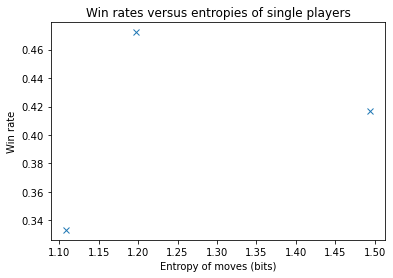

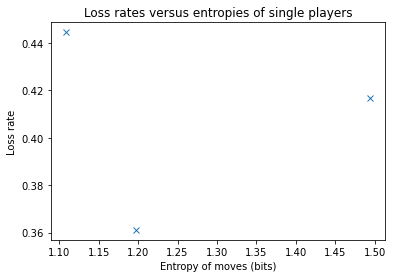

In [11]:
computeConditionalEntropyForAllPlayers()

# Entropy for player

In [12]:
def computeEntropyForPlayer(name):
    
    """
    Input: Name of a player. The format needs to be "Player1" or "Player2"
    
    Output: calculatedEntropy, winRate, lossRate, numGames
    """
    # Step 1: load all of the player's games' data:
    games = loadGamesForPlayer(name)[1]
    
    # Step 2: the player's moves are in the first column, pull these from
    #  each game into an array of samples that we can compute entropy on:
    moves = []
    results = []
    for gm in games:
        # Load data from game gameIndex into the variable game
        movesInThisGame = gm[name]

        # First column of game is the player's move, second is opponent's
        #  and third is the result.
        # Pull out the player's moves in this game (first column of game):
        
        # Pull out the results in this game (third column of game):
        resultsInThisGame = gm["Result"]
        # Append this player's moves to the array we're storing over all iterations:
        moves.append(np.array(movesInThisGame))
        # Append this player's results to the array over all iterations:
        results.append(np.array(resultsInThisGame))
    
    
    # Step 3: compute the entropy for this player's moves using our existing scripts:
    moves = np.array(moves)
    results = np.array(results)

    moves_array = moves.reshape((1,moves.shape[0]*moves.shape[1]))
    results_array = results.reshape((1,results.shape[0]*results.shape[1]))

    
    calculatedEntropy = entropyempirical(moves_array)

    # Step 4: compute the win and loss rates:

            
    winRate = np.sum(results_array == 1) / len(results_array[0])
    lossRate = np.sum(results_array == -1)/len(results_array[0])
    
    numGames = len(results_array[0])
    
    #print(winRate, lossRate)

    
    print('Entropy for {} over {} iterations: {:.04f}\n'\
          .format(name, len(results[0]), calculatedEntropy))

    return calculatedEntropy, winRate, lossRate, numGames

In [15]:
computeEntropyForPlayer("Player1")

player1: Player1, player2: Player2

Player2 Player2
Game 0 for Player1 (19 iterations):

Player1:	scis,	Player2:	papr,	result: win

Player1:	papr,	Player2:	rock,	result: win

Player1:	scis,	Player2:	papr,	result: win

Player1:	rock,	Player2:	papr,	result: los

Player1:	scis,	Player2:	rock,	result: los

Player1:	papr,	Player2:	scis,	result: los

Player1:	papr,	Player2:	papr,	result: tie

Player1:	scis,	Player2:	rock,	result: los

Player1:	scis,	Player2:	papr,	result: win

Player1:	scis,	Player2:	papr,	result: win

Player1:	papr,	Player2:	papr,	result: tie

Player1:	rock,	Player2:	rock,	result: tie

Player1:	rock,	Player2:	rock,	result: tie

Player1:	scis,	Player2:	rock,	result: los

Player1:	scis,	Player2:	rock,	result: los

Player1:	rock,	Player2:	scis,	result: win

Player1:	rock,	Player2:	papr,	result: los

Player1:	scis,	Player2:	papr,	result: win

Player1:	papr,	Player2:	rock,	result: win

player1: Player3, player2: Player2

player1: Player1, player2: Player3

Player3 Player3
Game 1

(1.57786, 0.42105263157894735, 0.39473684210526316, 38)

# Entropy for AllPlayers

In [13]:
def computeEntropyForAllPlayers():
    
    names = listPlayers()
    # Step 2: compute entropy for each player
    index = 0
    entropies = np.zeros(len(names))
    winRates = np.zeros(len(names))
    lossRates = np.zeros(len(names))
    
    for name in names:
        
        calculatedEntropy, winRate, lossRate, numGames = computeEntropyForPlayer(name)
        print('{} = {:.03f},\twin rate = {:.03f},\tloss rate = {:.03f}, num games = {:.03f}\n'.\
              format(name, calculatedEntropy, winRate, lossRate, int(numGames)))

    
        entropies[index] = calculatedEntropy
        winRates[index] = winRate
        lossRates[index] = lossRate

        index += 1
   
    # Plot the winRates and lossRates versus entropies:
    plt.figure(1);
    plt.plot(entropies, winRates, 'x')
    plt.title('Win rates versus entropies of single players')
    plt.xlabel('Entropy of moves (bits)')
    plt.ylabel('Win rate')
    
    plt.figure(2);
    plt.plot(entropies, lossRates, 'x')
    plt.title('Loss rates versus entropies of single players')
    plt.xlabel('Entropy of moves (bits)')
    plt.ylabel('Loss rate')

    # Creating the matrices for win and loss rates
    winToEntropyMatrix = np.column_stack((winRates,entropies))
    lossToEntropyMatrix = np.column_stack((lossRates,entropies))
    
    # Compute correlations and check if these are statistically significant:
    # Are these statistically significant?
    # This is running on Octave (not Matlab), so do this the hard way:
    """winToEntropyCorr = np.corrcoef(winRates, entropies)
    lossToEntropyCorr = np.corrcoef(lossRates, entropies)"""
    
    # Now compute the pValues:
    winToEntropyCorr, winToEntropyCorrPValue = stats.spearmanr(winRates,entropies)
    lossToEntropyCorr, lossToEntropyCorrPValue = stats.spearmanr(lossRates,entropies)
 
    
    print('Correlation of win  rate to entropy is: {:.04f} (pValue {:.04f})\n'.\
        format(winToEntropyCorr, winToEntropyCorrPValue))
    print('Correlation of loss rate to entropy is: {:.04f} (pValue: {:.04f})\n'.\
        format(lossToEntropyCorr, lossToEntropyCorrPValue))

    #return winToEntropyCorr, winToEntropyCorrPValue

Test1_Player1_Player2.txt
player1: Player1, player2: Player2

Test2_Player3_Player2.txt
player1: Player3, player2: Player2

Test5_Player1_Player3.txt
player1: Player1, player2: Player3

Player names:

Player1
Player2
Player3
player1: Player1, player2: Player2

Player2 Player2
Game 0 for Player1 (19 iterations):

Player1:	scis,	Player2:	papr,	result: win

Player1:	papr,	Player2:	rock,	result: win

Player1:	scis,	Player2:	papr,	result: win

Player1:	rock,	Player2:	papr,	result: los

Player1:	scis,	Player2:	rock,	result: los

Player1:	papr,	Player2:	scis,	result: los

Player1:	papr,	Player2:	papr,	result: tie

Player1:	scis,	Player2:	rock,	result: los

Player1:	scis,	Player2:	papr,	result: win

Player1:	scis,	Player2:	papr,	result: win

Player1:	papr,	Player2:	papr,	result: tie

Player1:	rock,	Player2:	rock,	result: tie

Player1:	rock,	Player2:	rock,	result: tie

Player1:	scis,	Player2:	rock,	result: los

Player1:	scis,	Player2:	rock,	result: los

Player1:	rock,	Player2:	scis,	result: win

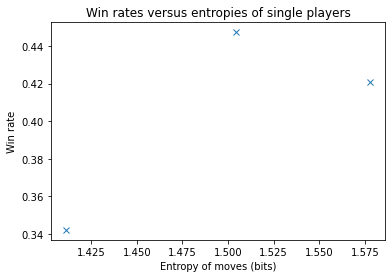

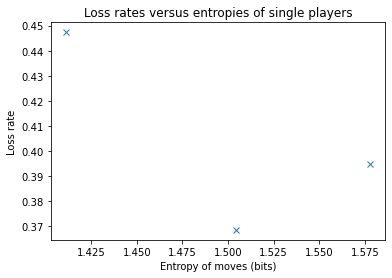

In [14]:
computeEntropyForAllPlayers()